 # Hyundai Ship Crew Prediction with Linear Regression
 You've been contracted by Hyundai Heavy Industries to help them build a predictive model for some ships. 
 You’ve been flown out to their HQ in Ulsan, South Korea!
 It’s one of the world’s largest manufacturers of large ships, including cruise liners!
 They need your help them give accurate estimates of how many crew members a ship will require.
 They are currently selling ships to some new customers and want you to create a model and use it to predict how many crew   members the ships will need.
 Your job is to create a regression model that will help predict how many crew members will be needed for future ships.
In other words, use the features you think will be useful to predict the value in the Crew column.

The client also mentioned that they have found that particular cruise lines will differ in acceptable crew counts, so it is most likely an important feature to include in your analysis!

## Import

** Import Python ML library that needed **

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

## Get The Data

We'll work with the cruise_ship_info csv file from the company.

In [64]:
Hyundai = pd.read_csv('cruise_ship_info.csv')

In [65]:
Hyundai.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [66]:
Hyundai.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [67]:
Hyundai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
Ship_name            158 non-null object
Cruise_line          158 non-null object
Age                  158 non-null int64
Tonnage              158 non-null float64
passengers           158 non-null float64
length               158 non-null float64
cabins               158 non-null float64
passenger_density    158 non-null float64
crew                 158 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [68]:
Hyundai.shape

(158, 9)

### Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below.(Don't worry about the the colors)

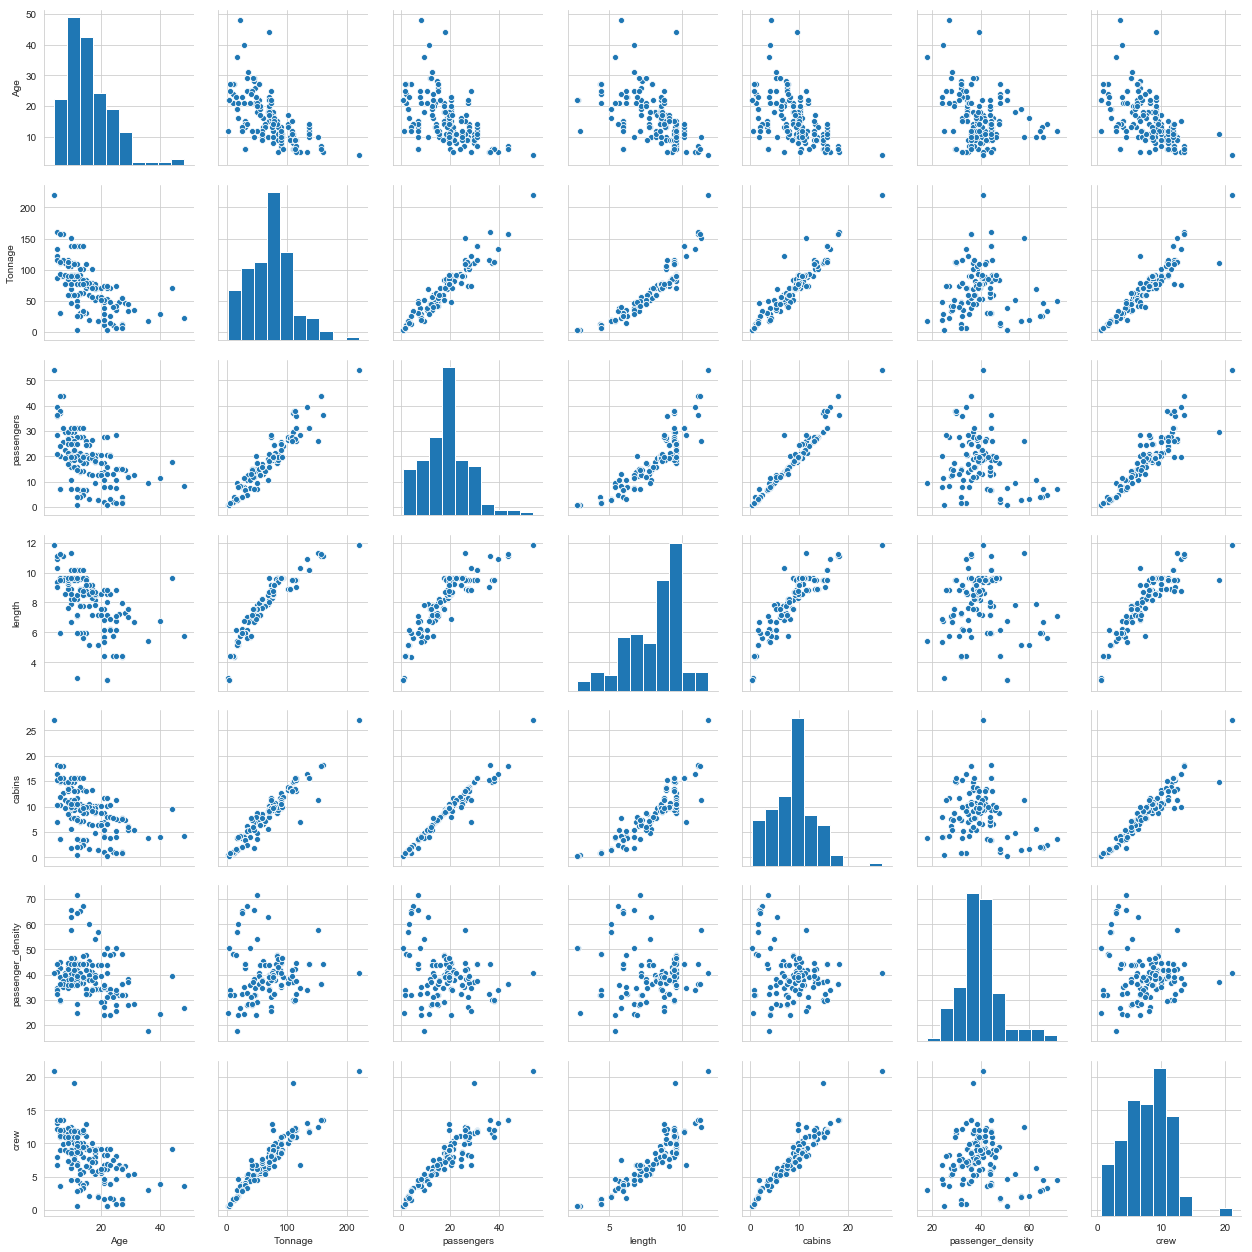

In [69]:
sns.set_style("whitegrid")
sns.pairplot(Hyundai)

** Create a linear model plot (using seaborn's lmplot) **

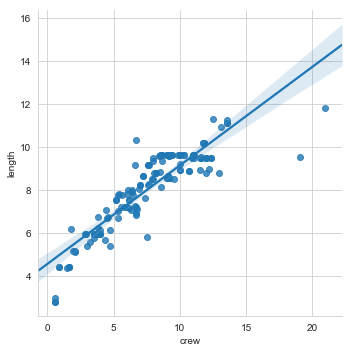

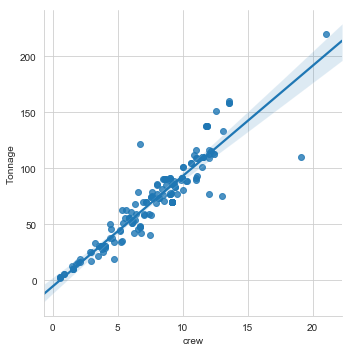

In [70]:
sns.lmplot(x='crew', y='length',data = Hyundai) ; sns.lmplot(x='crew', y='Tonnage',data = Hyundai)

** Since Hyundai said 'Cruise_line' is important features let see what in it **

In [132]:
Hyundai['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Windstar              3
Oceania               3
Seabourn              3
Cunard                3
Crystal               2
Azamara               2
Disney                2
Orient                1
Name: Cruise_line, dtype: int64

In [80]:
Hyundai.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


## Data Cleaning & Modifying

Dealing with categorical data for our ML model. Since Categorical data forbiden if fitted to our Linear Regression calculation
wee need to modify the data with integer, so dat can fit in our ML model.
In This Case we used One Hot encoder methode by use Pandas Get Dummies

In [91]:
Hyundai1 = pd.get_dummies(Hyundai,columns=["Cruise_line"])

In [92]:
Hyundai1.head()

,Ship_name,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Cruise_line_Azamara,Cruise_line_Carnival,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,Journey,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Quest,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Celebration,26,47.262,14.86,7.22,7.43,31.80,6.70,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Conquest,11,110.000,29.74,9.53,14.88,36.99,19.10,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Destiny,17,101.353,26.42,8.92,13.21,38.36,10.00,0,1,...,0,0,0,0,0,0,0,0,0,0


## Features selection

** Select and Split our data for Test & Train Data **

We remove some unnecessary data

In [109]:
X = Hyundai1.drop(['crew','Ship_name'], axis = 1)

In [110]:
y = Hyundai1[['crew']]

In [111]:
X.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
y.head()

,crew
0,3.55
1,3.55
2,6.70
3,19.10
4,10.00


## Data Train

We used around 70% of our data for data training purpose and use the rest 30% for data testing

In [113]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [114]:
lm = LinearRegression()

In [115]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
predict = lm.predict(X_test)

## Model Evaluation

In [117]:
MAE = metrics.mean_absolute_error(y_test, predict)
MSE = metrics.mean_squared_error(y_test, predict)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predict))

In [118]:
print('MAE :',MAE)
print('MSE :',MSE)
print('RMSE: ',RMSE)

MAE : 0.5184705119637603
MSE : 0.6004151192940403
RMSE:  0.7748645812618101


In [126]:
pd.DataFrame(predict).count()

0    48
dtype: int64

In [127]:
y_test.count()

crew    48
dtype: int64

In [128]:
pd.DataFrame(predict).head(10)

,0
0,12.292913
1,5.859296
2,5.137614
3,11.530122
4,6.591635
5,2.136902
6,10.761214
7,1.540013
8,9.998007
9,5.326704


In [135]:
y_test.head(10)

,crew
131,11.85
42,6.00
55,5.30
101,12.38
33,6.70
145,2.10
78,11.00
142,1.60
16,10.30
74,4.70


In [137]:
coeff = lm.coef_
inter = lm.intercept_

In [139]:
coeff

array([[ 9.99780475e-03,  1.13912287e-02, -1.09718057e-01,
         4.18489995e-01,  7.98299644e-01,  5.41670376e-03,
         1.85130081e-02,  1.59310483e-01,  4.79514539e-01,
        -4.55398471e-01,  1.42138442e-01, -4.75247696e-01,
         6.71056359e-01, -4.87215102e-01, -2.79493576e-01,
         5.54416944e-01,  4.69230057e-01,  4.99600361e-16,
        -3.71343328e-01, -1.32511073e-01,  1.77786030e-01,
        -1.23791516e+00,  1.75049126e-01,  1.03074043e-01,
         6.99627614e-01, -2.10592242e-01]])

In [142]:
print(inter)

[-1.66271131]
